# Visual Check of patches
need to find out if we have outliers
this test is visual checking only !!

In [1]:
import os
from scipy import misc

In [2]:
%pylab inline --no-import-all
from PIL import Image 

/Users/peterhirt/anaconda/envs/theano/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
from ipywidgets import widgets  
from ipywidgets import interact

###  testing one sample image

In [4]:
path = '../patches/consolidation/non-relevant'
file_name = '105_slice_8_consolidation_non-relevant_4_1.bmp' 
image = misc.imread(os.path.join(path,file_name), flatten= 0)

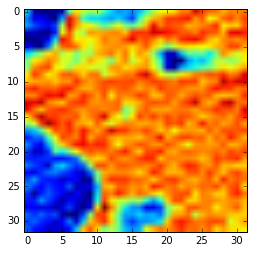

In [5]:
plt.imshow(Image.open(path + '/' + file_name)) 

# display category / sub-category images

In [6]:
# define the current work directory
cwd=os.getcwd()
print cwd

one_folder_up = os.path.dirname(os.getcwd())
print one_folder_up

/Users/peterhirt/datascience/ild-cnn/notebooks
/Users/peterhirt/datascience/ild-cnn


In [7]:
# not up-to-date

comments = ['all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK',
            'all OK'
           ]
print comments[0][1], 'there are', len(comments), 'categories or sub-categories'

l there are 24 categories or sub-categories


In [8]:
(cwdtop,tail) = os.path.split(cwd)

print cwdtop
print 'taken out ', tail

patch_dir = os.path.join(cwdtop,'patches')
category_list = os.walk(patch_dir).next()[1]
print category_list

/Users/peterhirt/datascience/ild-cnn
taken out  notebooks
['consolidation', 'fibrosis', 'ground_glass', 'healthy', 'micronodules', 'reticulation']


In [9]:
ind = 0

for category in category_list:
    category_dir = os.path.join(patch_dir, category)
    print category
    
    sub_category_list = (os.listdir(category_dir))
    print sub_category_list
    
    category_count = 0
    
    for sub_category in sub_category_list:
        
        sub_category_dir = os.path.join(category_dir, sub_category)
        attribute_list = (os.listdir(sub_category_dir))
         
        print sub_category , len(attribute_list), comments[ind]
        
        category_count = category_count + len(attribute_list)
        
        ind += 1
    
    print 'the count of the entire category is : ', category_count
    print ''

consolidation
['apical', 'diffuse', 'non-relevant', 'peripheral_sub_pleural']
apical 6 all OK
diffuse 23 all OK
non-relevant 14 all OK
peripheral_sub_pleural 15 all OK
the count of the entire category is :  58

fibrosis
['apical', 'basal', 'diffuse', 'non-relevant', 'perihilar', 'peripheral_sub_pleural']
apical 4 all OK
basal 367 NOK: 112-127, 145, 146
diffuse 365 all OK
non-relevant 359 NOK: 0-16, 325-330
perihilar 38 all OK
peripheral_sub_pleural 11 all OK, but funny
the count of the entire category is :  1144

ground_glass
['apical', 'basal', 'diffuse', 'non-relevant', 'peripheral_sub_pleural']
apical 12 all OK
basal 186 all OK
diffuse 140 NOK: 33-64
non-relevant 486 NOK: 31-36,43-86,89,87,94-92,96,97,104,111,110,115,117,118,120,136,137,201,207-217
peripheral_sub_pleural 38 all OK
the count of the entire category is :  862

healthy
['apical', 'non-relevant']
apical 59 all OK
non-relevant 1571 NOK: 266-555, and more, not all were checked
the count of the entire category is :  1630

m

# interactive part

In [10]:
# choose the dataset to look at

category_chosen = category_list[1]
print category_chosen

category_dir = os.path.join(patch_dir, category_chosen)

sub_category_list = (os.listdir(category_dir))

sub_category_chosen = sub_category_list[1]
print sub_category_chosen

fibrosis
basal


In [11]:
images = []
filenames = []

category = category_chosen
    
category_dir = os.path.join(patch_dir, category)
# print  'the path into the categories is: ', category_dir
    
sub_categories_dir_list = (os.listdir(category_dir))
    
subCategory = sub_category_chosen
            
subCategory_dir = os.path.join(category_dir, subCategory) 
        
subCat = (os.listdir(subCategory_dir))
        
num_patches = 0       
for file in subCat:
                
    if file.find('.bmp') > 0:
                
        # load the .bmp file into array       
        image = misc.imread(os.path.join(subCategory_dir,file), flatten= 0)
        # append the array to the dataset list
                
        images.append(image)
        filenames.append(file)
        
        num_patches+=1
print 'found', num_patches, 'patches' 
        

found 367 patches


In [12]:
from traitlets import CInt, link
class Counter(widgets.DOMWidget):
    value = CInt(0, sync=True)

/Users/peterhirt/anaconda/envs/theano/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: metadata {'sync': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  app.launch_new_instance()


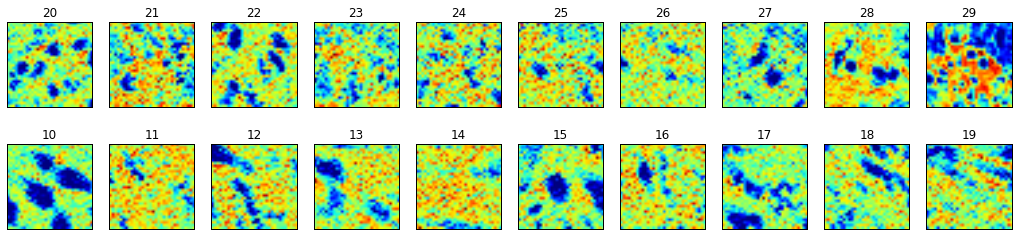

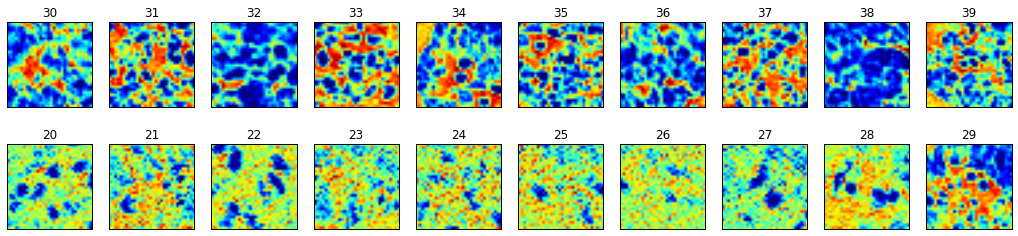

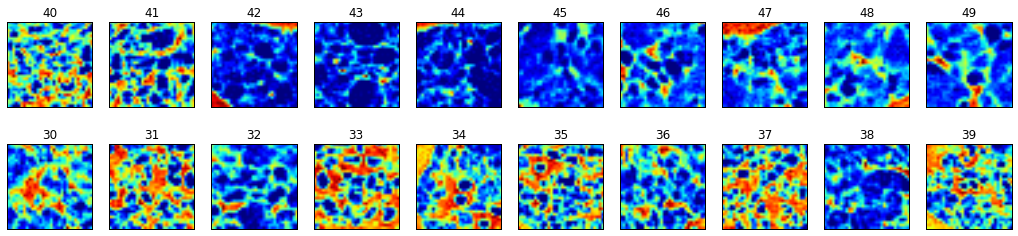

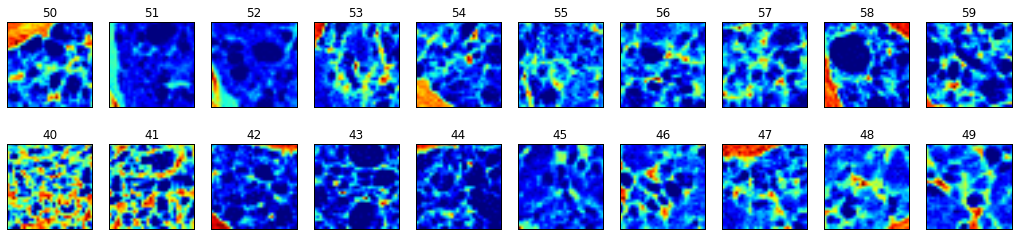

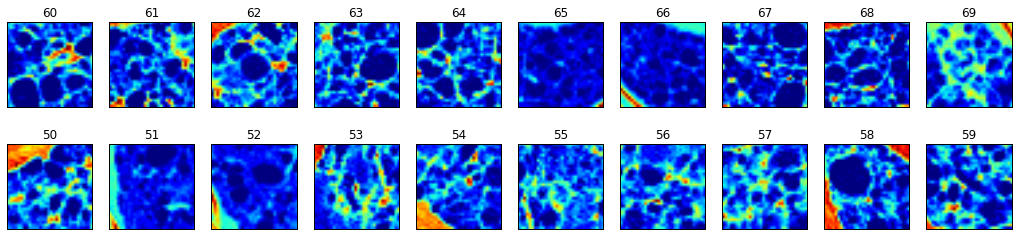

In [13]:
button = widgets.Button(description='display next 20 patches')
display(button)

counter = Counter()
set = 0


def on_button_clicked(b):
    
    counter.value += 1 if counter.value < 20 else 0
    
    set = counter.value * 10
    
    
    if num_patches < 20:
        print 'Cannot use this for patch sets smaller than 20'
        return

    print b
    fig = plt.figure()
    fig.set_size_inches(18, 8)
 
    for j in range(0,2):
        for i in  range(1,11):
    
            patch = fig.add_subplot(j+1,10,i)
        
    
            ind = (i+j*10-1+set)
            patch.set_title(str(ind))
            patch.axes.get_xaxis().set_visible(False)
            patch.axes.get_yaxis().set_visible(False)
       
            patch.imshow(images[ind]);
        
    
   
    
    
        
button.on_click(on_button_clicked)
   
        

In [ ]:
def browse_images(images):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title('Training: %s' % i)
        plt.show()
    interact(view_image, i=(0,n-1))

In [ ]:
browse_images(images)

In [ ]:
def browse_images(listOfImageNames):
    n = len(listOfImageNames)
    def view_image(i):
        display(Image(filename=listOfImageNames[i]))
    interact(view_image, i=(0,n-1))

In [ ]:
browse_images(listOfImageNames)

In [ ]:
listOfImageNames

In [ ]:
type(listOfImageNames)